# Juridic Portuguese Text Summarization 

### Development in Progress. . .

In [2]:
import pickle
import os
import codecs
import nltk
from collections import Counter
from itertools import chain
from keras.utils.data_utils import get_file

Using TensorFlow backend.


In [3]:
FN = 'vocabulary-embedding'
vocab_size = 40000
embedding_dim = 100
lower = False # dont lower case the text

In [4]:
# Create list of petitions
path = '../data/petitions/'
petitions = []
for i, file in enumerate(os.listdir(path)):
    if file.endswith(".txt"):
#         file = os.rename(path+file,'{}pet{}.txt'.format(path,i))
        petitions.append(file)

In [5]:
petitions

['pet36.txt',
 'pet74.txt',
 'pet76.txt',
 'pet61.txt',
 'pet38.txt',
 'pet32.txt',
 'pet0.txt',
 'pet85.txt',
 'pet27.txt',
 'pet86.txt',
 'pet62.txt',
 'pet63.txt',
 'pet25.txt',
 'pet75.txt',
 'pet22.txt',
 'pet94.txt',
 'pet30.txt',
 'pet29.txt',
 'pet55.txt',
 'pet9.txt',
 'pet90.txt',
 'pet20.txt',
 'pet80.txt',
 'pet15.txt',
 'pet45.txt',
 'pet73.txt',
 'pet28.txt',
 'pet18.txt',
 'pet95.txt',
 'pet34.txt',
 'pet56.txt',
 'pet37.txt',
 'pet50.txt',
 'pet93.txt',
 'pet7.txt',
 'pet12.txt',
 'pet1.txt',
 'pet98.txt',
 'pet10.txt',
 'pet21.txt',
 'pet67.txt',
 'pet83.txt',
 'pet91.txt',
 'pet42.txt',
 'pet49.txt',
 'pet46.txt',
 'pet69.txt',
 'pet58.txt',
 'pet77.txt',
 'pet13.txt',
 'pet14.txt',
 'pet11.txt',
 'pet19.txt',
 'pet71.txt',
 'pet47.txt',
 'pet96.txt',
 'pet51.txt',
 'pet39.txt',
 'pet33.txt',
 'pet57.txt',
 'pet66.txt',
 'pet81.txt',
 'pet53.txt',
 'pet99.txt',
 'pet88.txt',
 'pet65.txt',
 'pet23.txt',
 'pet87.txt',
 'pet8.txt',
 'pet92.txt',
 'pet89.txt',
 'pet24.txt

In [6]:
# Generating corpus and list of petitions' texts
pet_text_list = []
corpus = ''
for petition in petitions:
    with open(path + petition, 'r') as f:
        text = f.read()
        pet_text_list.append(f.read())
        corpus = corpus + text

# Build vocabulary

In [7]:
def get_vocab(lst):
    vocabcount = Counter(w for txt in lst for w in txt.split())
    vocab = set(nltk.word_tokenize(corpus))
    return vocab, vocabcount


In [8]:
vocab, vocabcount = get_vocab(nltk.word_tokenize(corpus))

In [9]:
print(vocabcount)

Counter({'.': 7664, 'de': 7009, 'a': 5379, 'e': 3828, 'o': 3764, 'do': 3301, 'que': 3276, 'da': 2720, ')': 2373, '(': 2000, 'em': 1935, ':': 1723, '-': 1606, 'no': 1334, 'com': 1081, 'por': 1030, 'não': 999, 'para': 962, 'ao': 879, 'se': 852, 'ou': 852, 'os': 773, ';': 708, 'na': 706, 'à': 690, 'dos': 633, 'é': 615, 'como': 602, 'valor': 549, 'sua': 538, 'seu': 510, 'dano': 506, 'um': 479, 'uma': 456, 'as': 446, 'ser': 428, 'nº': 427, 'pela': 418, 'direito': 408, 'moral': 408, 'art': 400, 'pelo': 398, 'reais': 397, '.-': 376, 'º': 369, 'danos': 316, 'seja': 312, 'nos': 311, 'das': 294, 'parte': 292, 'caso': 280, 'foi': 270, 'autor': 262, 'indenização': 258, 'sob': 257, 'presente': 246, 'pagamento': 242, 'autora': 239, 'consumidor': 236, 'mais': 232, 'bem': 229, 'prova': 229, 'mil': 227, 'nome': 222, 'sendo': 216, '-se': 216, 'sem': 215, 'já': 214, 'serviços': 213, 'ainda': 205, 'vem': 204, 'forma': 202, 'empresa': 200, 'assim': 198, 'conforme': 194, 'pessoa': 191, 'termos': 188, 'pelos

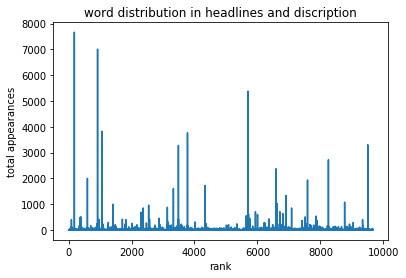

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([vocabcount[w] for w in vocab]);
plt.title('word distribution in headlines and discription')
plt.xlabel('rank')
plt.ylabel('total appearances');

# Index Words

In [11]:
empty = 0 # RNN mask of no data
eos = 1  # end of sentence
start_idx = eos+1 # first real word

In [12]:
def get_idx(vocab, vocabcount):
    word2idx = dict((word, idx+start_idx) for idx,word in enumerate(vocab))
    word2idx['<empty>'] = empty
    word2idx['<eos>'] = eos
    
    idx2word = dict((idx,word) for word,idx in word2idx.items())

    return word2idx, idx2word

In [13]:
word2idx, idx2word = get_idx(vocab, vocabcount)

# Word Embedding

In [14]:
# Read GloVe
fname = 'glove.6B.%dd.txt'%embedding_dim
datadir_base = os.path.expanduser(os.path.join('~', '.keras'))
if not os.access(datadir_base, os.W_OK):
    datadir_base = os.path.join('/tmp', '.keras')
datadir = os.path.join(datadir_base, 'datasets')
glove_name = os.path.join(datadir, fname)
if not os.path.exists(glove_name):
    path = 'glove.6B.zip'
    path = get_file(path, origin="http://nlp.stanford.edu/data/glove.6B.zip")
   

In [1]:
# Just once!
#!unzip {datadir}/{'glove.6B.zip'}

In [17]:
#path = 'glove.6B.zip'

In [18]:
#glove_weights = get_glove_weights(path, origin="http://nlp.stanford.edu/data/glove.6B.zip")

In [21]:
# -*- coding: utf-8 -*-

from __future__ import absolute_import
from __future__ import division, print_function, unicode_literals

from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words


LANGUAGE = "portuguese"
SENTENCES_COUNT = 3


if __name__ == "__main__":
#     url = "https://pt.wikipedia.org/wiki/L%C3%ADngua_portuguesa"
#     parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
    # or for plain text files
    parser = PlaintextParser.from_file("../data/petitions/pet5.txt", Tokenizer(LANGUAGE))
    stemmer = Stemmer(LANGUAGE)

    summarizer = Summarizer(stemmer)
    summarizer.stop_words = get_stop_words(LANGUAGE)
    summary = ''

    for sentence in summarizer(parser.document, SENTENCES_COUNT):
        summary = summary + str(sentence)
        print(sentence,type(sentence))
    print(summary)

se vê os atos praticados pela empresa ré refletem a má-fé a irresponsabilidade que ao longo dos meses sabendo que o  não deve insiste sadicamente em prejudicá-lo usando de ardis em incluir e manter seu nome no ferindo destarte direito subjetivo individual do consumidor. <class 'sumy.models.dom._sentence.Sentence'>
com a conduta arbitrária da  em proceder à inscrição indevida de seu nome no  responsável por denegrir sua imagem e por impedi-lo de utilizar os serviços bancários necessários ao desenvolvimento de suas atividades pessoais e profissionais outra alternativa não restou ao  senão socorrer-se do   para ver declarada a inexistência da dívida reclamada -  - :   . <class 'sumy.models.dom._sentence.Sentence'>
cobrança indevida especialmente quando se questiona o indébito por vias administrativas infrutíferas é cabível a condenação em dobro seja para alcançar o ressarcimento financeiro de valores dispendidos antecipadamente seja para lograr formação didática daqueles que usam de instr